In [62]:
# Import libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/csilos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
# Open pros, cons, and stopwords file
pros_file = open('Pros.txt','r')
cons_file = open('Cons.txt','r')
stopwords_file = open('stopwords_en-2.txt','r')

# Initialize lists
stopwords = []
pros_words = []
cons_words = []

# Populate list of stopwords
for word in stopwords_file:
    stopwords.append(word.strip())

# Updating the stopword list ------- NEED TO UPDATE ----------
stopwords.extend(['pro','con','public','private','prison','prisons','zealand'])

In [95]:
# Create list of words from the pros input file
for pros_file, pros_list in [(pros_file, pros_words)]:
    for line in pros_file:
        parts = line.strip().split()
        for word in parts:
            pros_list.append(word.lower())

# Create list of words from the cons input file
for cons_file, cons_list in [(cons_file, cons_words)]:
    for line in cons_file:
        parts = line.strip().split()
        for word in parts:
            cons_list.append(word.lower())

In [96]:
# Tokenize each text
pros_tokens = nltk.word_tokenize(' '.join(pros_list))
cons_tokens = nltk.word_tokenize(' '.join(cons_list))  

In [97]:
# Create list of cleaned pros words
cleaned_pros = []
for token in pros_tokens:
    # Only append tokens that are NOT stopwords, are alphanumeric, and are greater than 3 characters
    if (token.lower() not in stopwords) and (token.isalnum()) and (len(token)>3):
        cleaned_pros.append(token.lower())

# Create list of cleaned cons words
cleaned_cons = []
for token in cons_tokens:
    # Only append tokens that are NOT stopwords, are alphanumeric, and are greater than 3 characters
    if (token.lower() not in stopwords) and (token.isalnum()) and (len(token)>3):
        cleaned_cons.append(token.lower())


In [98]:
# Extract bigrams for each text
pros_bigrams = list(nltk.bigrams(cleaned_pros))
cons_bigrams = list(nltk.bigrams(cleaned_cons))

In [99]:
# Calculate the sentiment using vader library
pros_analyzer = SentimentIntensityAnalyzer()

# vader needs strings as input. Transforming the list into string
pros_clean_text_str = ' '.join(cleaned_pros)
vad_sentiment = pros_analyzer.polarity_scores(pros_clean_text_str)

pos = vad_sentiment ['pos']
neg = vad_sentiment ['neg']
neu = vad_sentiment ['neu']

print ('\nThe following is the distribution of the sentiment for the file -', pros_file)
print (f'\n--- It is positive for {pos:.3f}')
print (f'\n--- It is negative for {neg:.3f}')
print (f'\n--- It is neutral for {neu:.3f}', '\n')



The following is the distribution of the sentiment for the file - <_io.TextIOWrapper name='Pros.txt' mode='r' encoding='UTF-8'>

--- It is positive for 0.205

--- It is negative for 0.155

--- It is neutral for 0.640 



In [100]:
# calculating the sentiment using vader library
cons_analyzer = SentimentIntensityAnalyzer()

# vader needs strings as input. Transforming the list into string
cons_clean_text_str = ' '.join(cleaned_cons)
vad_sentiment = pros_analyzer.polarity_scores(cons_clean_text_str)

pos = vad_sentiment ['pos']
neg = vad_sentiment ['neg']
neu = vad_sentiment ['neu']

print ('\nThe following is the distribution of the sentiment for the file -', cons_file)
print (f'\n--- It is positive for {pos:.3f}')
print (f'\n--- It is negative for {neg:.3f}')
print (f'\n--- It is neutral for {neu:.3f}', '\n')


The following is the distribution of the sentiment for the file - <_io.TextIOWrapper name='Cons.txt' mode='r' encoding='UTF-8'>

--- It is positive for 0.100

--- It is negative for 0.242

--- It is neutral for 0.658 



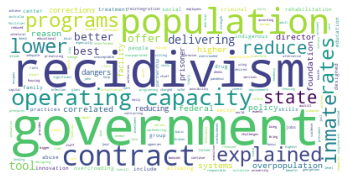

In [101]:
# Define the wordcloud parameters
pros_wc = WordCloud(background_color = 'white', max_words=2000)

# Generate word cloud
pros_wc.generate(' '.join(cleaned_pros))

# storing to file
#wc.to_file('pros.png')

# showing the cloud
plt.imshow(pros_wc)
plt.axis('off')
plt.show()

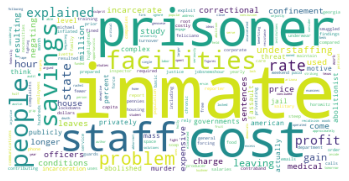

In [102]:
# defining the wordcloud parameters
cons_wc = WordCloud(background_color = 'white', max_words=2000)

# generating word cloud
cons_wc.generate(' '.join(cleaned_cons))

# storing to file
#wc.to_file('cons.png')

# showing the cloud
plt.imshow(cons_wc)
plt.axis('off')
plt.show()